In [2]:
# colab 연결용
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
x_data = mnist.data.astype('float32')
y_data = mnist.target.astype(int)

In [4]:
from sklearn.model_selection import train_test_split
import torch

device = "cuda"
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train.values), torch.tensor(X_test.values)
y_train, y_test = torch.tensor(y_train.values), torch.tensor(y_test.values)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [5]:
import torch.nn.functional as F
from torch import nn

In [10]:
# Feedforward Model
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
  def forward(self, x):
    outputs = self.linear_relu_stack(x)
    return outputs

In [13]:
lr = 0.001
epochs = 2000
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [14]:
loss_save_arr=[]
for i in range(epochs):
  # Train
  model.train()
  optimizer.zero_grad()
  output = model(X_train)
  loss = criterion(output, y_train.long())

  loss.backward()
  optimizer.step()
  loss_save_arr.append(loss.data)

  if (i%100 == 0):
    print("=====")
    print("epoch ", i)
    print("loss ", loss.data)
    _, pred = torch.max(output.data, axis=1)
    print("train_accuracy : {:0.3f}".format(float((pred==y_train).sum())/y_train.size(0)))
    model.eval()
    with torch.no_grad():
      output = model(X_test)
      _, pred = torch.max(output.data, axis=1)
      print("test_accuracy : {:0.3f}".format(float((pred==y_test).sum())/y_test.size(0)))

=====
epoch  0
loss  tensor(9.9618, device='cuda:0')
train_accuracy : 0.102
test_accuracy : 0.240
=====
epoch  100
loss  tensor(0.4131, device='cuda:0')
train_accuracy : 0.886
test_accuracy : 0.884
=====
epoch  200
loss  tensor(0.2963, device='cuda:0')
train_accuracy : 0.916
test_accuracy : 0.908
=====
epoch  300
loss  tensor(0.2398, device='cuda:0')
train_accuracy : 0.932
test_accuracy : 0.919
=====
epoch  400
loss  tensor(0.2044, device='cuda:0')
train_accuracy : 0.941
test_accuracy : 0.926
=====
epoch  500
loss  tensor(0.1792, device='cuda:0')
train_accuracy : 0.948
test_accuracy : 0.931
=====
epoch  600
loss  tensor(0.1601, device='cuda:0')
train_accuracy : 0.953
test_accuracy : 0.935
=====
epoch  700
loss  tensor(0.1448, device='cuda:0')
train_accuracy : 0.958
test_accuracy : 0.938
=====
epoch  800
loss  tensor(0.1323, device='cuda:0')
train_accuracy : 0.962
test_accuracy : 0.942
=====
epoch  900
loss  tensor(0.1217, device='cuda:0')
train_accuracy : 0.965
test_accuracy : 0.943
==

In [44]:
import sys
def getResult(prediction):
  max_index = 0
  max_predict = -1*sys.maxsize
  for i,predict in enumerate(prediction):
    if max_predict < predict:
      max_index = i
      max_predict = predict
  return max_index

In [49]:
prediction = model(X_train[0,:])
answer = y_train[0].cpu()
print(getResult(prediction))
print(answer)

5
tensor(5)


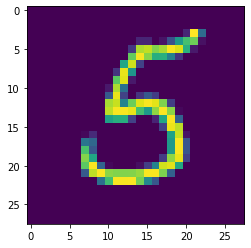

In [50]:
from matplotlib import pyplot as plt
sample_input = X_train[0].reshape(28,28).cpu()
# sample_input
plt.imshow(sample_input)
plt.show()